## PREDICTING CUSTOMER CHURN

RESEARCH QUESTIONS
1. What are the most important features and the influence these features have in predicting customer churn with a particular row of data?

2. Which features are the strongest in predicting customer churn?

3. Does the contribution of each feature vary by gender or tenure?

In [44]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

### ABOUT THE DATA

In [45]:
telco = pd.read_csv("data/Telco-Customer-Churn.csv")

In [46]:
print(f"The shape of the dataset is {telco.shape}")

The shape of the dataset is (7043, 21)


In [47]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [48]:
telco.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### EXPLORATORY DATA ANALYSIS:

### UNDERSTANDING THE COLUMNS:

1. Churn (Target Variable)
    Churn - Whether the customer left within the last month (Yes/No)

2. Services Signed Up For:  phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

3. Customer Account Information
    
    tenure - How long the customer has been with the company (in months)

    Contract - Contract type (Month-to-month, One year, Two year)

    PaymentMethod - Payment method (Electronic check, Mailed check, Bank transfer, Credit card)

    PaperlessBilling - Whether the customer uses paperless billing (Yes/No)

    MonthlyCharges - Monthly charges to the customer

    TotalCharges - Total charges to the customer over their tenure

4. Demographic Information
    gender - Gender of the customer (Male/Female)

    SeniorCitizen - Whether the customer is a senior citizen (1 for Yes, 0 for No)

    Partner - Whether the customer has a partner (Yes/No)

    Dependents - Whether the customer has dependents (Yes/No)

5. Additional Column:
    customerID - Unique identifier for each customer (not part of any category)

In [49]:

telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [50]:
# Convert TotalCharges column to float for proper analysis. 
# This columns contains empty strings which will forced as NaN during conversion
# We will hande it during later
telco["TotalCharges"] = pd.to_numeric(telco["TotalCharges"], errors="coerce")

In [51]:
# Descriptive statistics for numerical columns
telco.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


From the descriptive stats above, you can see the longest a customer have been with the company is 72 months (6 years) and minimum is 0 month (Quite awkward, we will investigate this next..). Secondly, the monthly charges and total charges as we know are reated as total charges is a result of tenure * monthly charges

In [52]:
# descriptive stats for categorical variables
telco.describe(include="object").T

,count,unique,top,freq
customerID,7043,7043,3186-AJIEK,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


Phone service is the most used service by about 6,000 customers (that's like approx 90% of our cutomers), while the rest aren't mostly used by the customers. Most of our customers are males, don't have a partner and dependents. There a 4 unique payment method available to customers and the commonly used is E-Check.

In [53]:
# Inspecting each columns closely to understand thier values

for n in telco.select_dtypes(include="object"):   
    print(n + ":", telco[n].unique())

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


Observed columns such as MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV and StreamingMovies 
are expected to be yes or No. Let's investigate further for the extra unique value "No internet service".

After careful investigations, it's observed that the extra unique value is nothing special than a 'No' situation because most of these affected feature(service) depends on if the customer has an internet service bought, and MultipleLine service depend on the availability of a phone service first...so for consistency we can replace with 'No" string. But before that let's verify our observation.



In [54]:
# Verification of the above hypothesis:

# checking if all customers with the mutiple line service filled with "No phone service" aren't subscribed to a phoneservice
answer = telco[telco["MultipleLines"] == "No phone service"]["PhoneService"].unique()[0]
print("The unique value in the PhoneService column for all customers where their  MultipleLines column is filled as 'no phone service'  is/are: " 
      + answer)

# Answer is True

# checking if the absennce or present of the other affected services(such as OnlineSecurity) are all dependent on an InternetService.
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]

for col in cols:
    answer = telco[telco[col] == "No internet service"]["InternetService"].unique()[0]
    print("The unique value in the InternetService column for all customers where their " + 
          col + " column is filled as 'no internet service'  is/are: " + answer)


The unique value in the PhoneService column for all customers where their  MultipleLines column is filled as 'no phone service'  is/are: No
The unique value in the InternetService column for all customers where their OnlineSecurity column is filled as 'no internet service'  is/are: No
The unique value in the InternetService column for all customers where their OnlineBackup column is filled as 'no internet service'  is/are: No
The unique value in the InternetService column for all customers where their DeviceProtection column is filled as 'no internet service'  is/are: No
The unique value in the InternetService column for all customers where their TechSupport column is filled as 'no internet service'  is/are: No
The unique value in the InternetService column for all customers where their StreamingTV column is filled as 'no internet service'  is/are: No
The unique value in the InternetService column for all customers where their StreamingMovies column is filled as 'no internet service'  

In [55]:
cols = cols + ["MultipleLines"]
# print(cols)

for n in cols:
    telco[n] = np.where(telco[n] == "Yes", "Yes", "No")
    # let's confirm they where all replaced appropriately
    print(n + ":", telco[n].unique())


OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
MultipleLines: ['No' 'Yes']


In [56]:
# Visualize unique values for num columns
unique = telco.select_dtypes(exclude="object").nunique()

fig = px.bar(unique, log_y=True, title="Number of Numerical Unique values")
fig.update_xaxes(categoryorder="total descending")
fig.show()


### QUALITY INVESTIGATION

In [57]:
# Checking for duplicates

duplicates = telco.duplicated().sum()

print(f"There are {duplicates} duplicates in the dataset")

There are 0 duplicates in the dataset


In [58]:
# checking for missing values

px.imshow(telco.isna(), color_continuous_scale=["white", "red"])

In [59]:
# let's use pandas/bar chart to confirm missing values as imshow() sometimes don't catch small number of NaNs due to scaling

nans = telco.isna().sum()

print(f"There are {nans.sum()} missing values in the dataset")
print(nans)

px.bar(
    x=telco.isna().sum().index,
    y=telco.isna().sum().values,
    title="Total Missing Values per Column",
    labels={"x": "Column", "y": "Missing Count"},
    color=telco.isna().sum().values,
    color_continuous_scale="reds"
).show()

There are 11 missing values in the dataset
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


### INVESTIGATING THE CAUSE OF THE MISSING VALUES

Remember the TotalCharges column we converted to float? the empty string cells where inputed as NaN. 
Although it's just 11 let's investigate how well we can handle it.
By Default, It's assumed the TotalCharges is a product of monthly charge and tenure for each customer. Well,
If True, it means the tenure for customers with Totalcharge of NaN could be 0 tenure (possiby they lasted less than a month). let's verify


In [60]:

telco[telco["TotalCharges"].isna()][["MonthlyCharges", "tenure", "TotalCharges"]]

,MonthlyCharges,tenure,TotalCharges
488,52.55,0,NaN
753,20.25,0,NaN
936,80.85,0,NaN
1082,25.75,0,NaN
1340,56.05,0,NaN
3331,19.85,0,NaN
3826,25.35,0,NaN
4380,20.00,0,NaN
5218,19.70,0,NaN
6670,73.35,0,NaN


In [61]:
# Now that we see it's true...let's fill missing values in the TotalCharges column with 0

telco.TotalCharges = telco.TotalCharges.fillna(0)

telco.isna().sum().sum()

np.int64(0)

# OUTLIERS

In [19]:
# Analyze only the numerical columns since outlier is only possible in a numerical variable, 
# except the SeniorCitizen with binary possible value.

# num_df = telco.select_dtypes(include="number").drop("SeniorCitizen", axis=1)

# Tenure
px.box(telco, y="tenure", title="Outlier in Tenure", labels={"x": "Feature", "y": ""})

In [20]:
# MonthlyCharges

px.box(telco, y="MonthlyCharges", title="Outlier in MonthlyCharges", labels={"x": "Feature", "y": ""})

In [21]:
# TotalCharges
px.box(telco, y="TotalCharges", title="Outlier in TotalCharges", labels={"x": "Feature", "y": ""})

### There are no oultiers in the numerical columns

# CONTENT INVESTIGATION

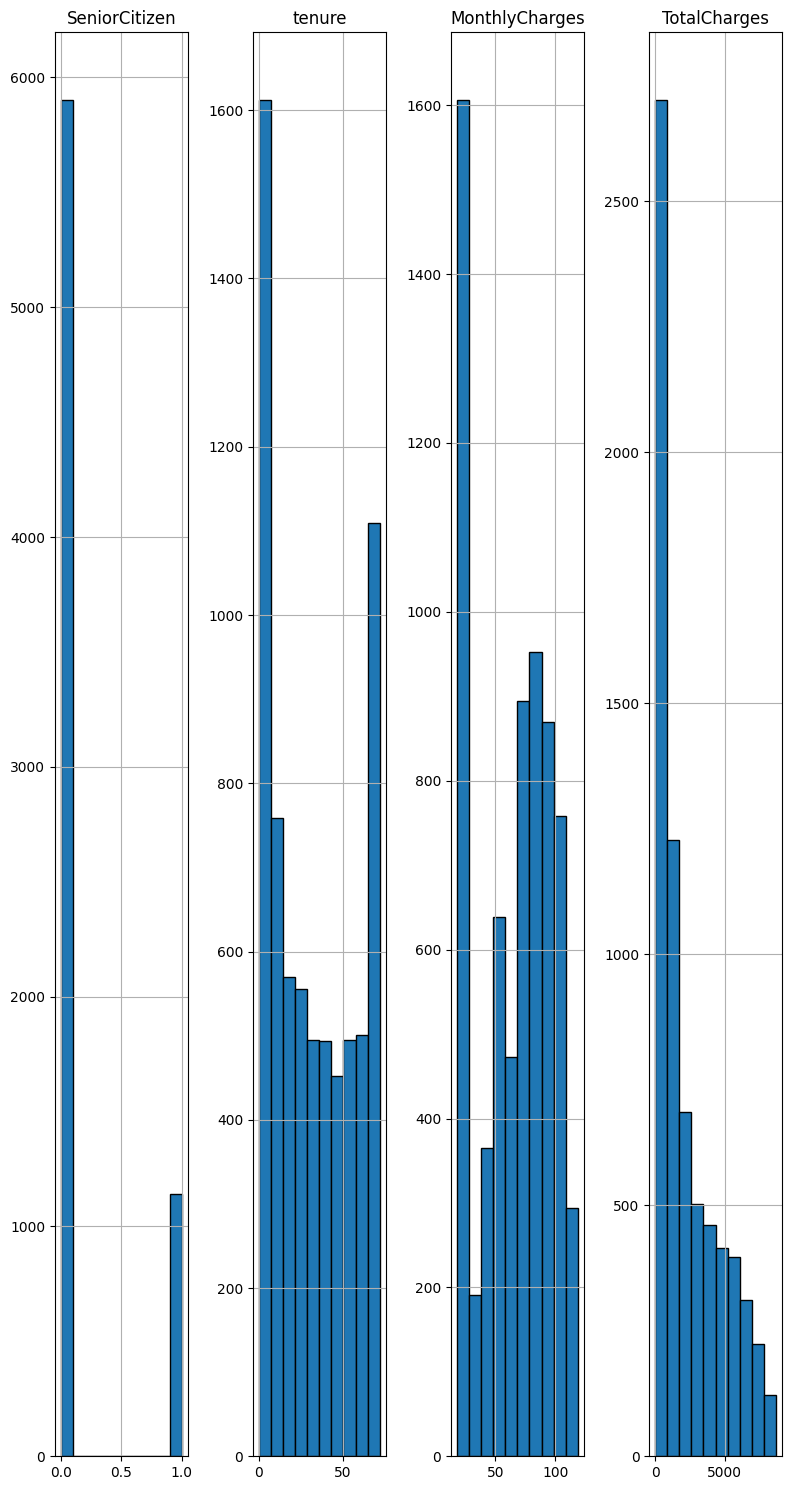

In [22]:
telco.hist(bins=10, figsize=(10,15), edgecolor="black", layout=(-1, 5))
plt.tight_layout()

In [23]:
counts = telco.SeniorCitizen.value_counts().reset_index()

fig = px.bar(counts, x="SeniorCitizen", y="count")
fig.update_xaxes(type="category")
fig.show()

counts

,SeniorCitizen,count
0,0,5901
1,1,1142


As expected, a high amoun of our telcom customers are below age of 65 (senior citizen) as elderly people above 65 would have very low telcom-related activities...

In [24]:
px.histogram(telco, x="Churn", color="Churn", facet_col="SeniorCitizen")

From the above graph we can see not by suprise, there's an equally balanced churn vs non-churn rate in Senior Citizens (i.e ages below 65). But the Non-Senior citizens do have a solid low churn rate.

In [25]:
px.histogram(telco, x="Churn", color="Churn", facet_col="PaperlessBilling")

In [26]:
# Payment Methods

fig = px.bar(telco, x="PaymentMethod", color="PaymentMethod", title="Payment Method used by Telcom customers")
fig.show()

The Most used payment method is E-Check. Also, the rest of the other payment methods are used almost equally.

### FEATURE RELATIONSHIP

In [27]:
num_df = telco.select_dtypes(exclude="object")
px.imshow(num_df.corr())

CATEGORY ENCODING


In [28]:
# Only categorical features can be encoded so we exclude the numerical columns, 
# and the ID column (since will be dropped before before training)

cat_cols = telco.select_dtypes("object").drop("customerID", axis=1).columns.values

# Since there aren't any Order in values in any of the cat cols we will Encode using labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    telco[col] = le.fit_transform(telco[col])

print(telco.select_dtypes('object').columns)
print(cat_cols)

Index(['customerID'], dtype='object')
['gender' 'Partner' 'Dependents' 'PhoneService' 'MultipleLines'
 'InternetService' 'OnlineSecurity' 'OnlineBackup' 'DeviceProtection'
 'TechSupport' 'StreamingTV' 'StreamingMovies' 'Contract'
 'PaperlessBilling' 'PaymentMethod' 'Churn']


In [29]:
# verify encode worked
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,1,...,1,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,1,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,0,1,...,1,1,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [30]:
# Let's drop unwanted features as we approach training
telco.drop("customerID", axis=1, inplace=True)
# telco

In [31]:
# SPLIT features from target variable before ROS

X = telco.drop("Churn", axis=1)
y = telco["Churn"]

### CLASS BALANCE

In [32]:
count = telco.Churn.value_counts().reset_index()

px.bar(count, x="Churn", y="count", title="Class Imbalance in Churn class")



Let's fix the class imbalance in the churn class which can lead to bias in our model. We will do so using RandomOverSampler from imbalanced learn.

In [33]:
print("Size of Features data frame before resampling is: ", X.shape)
print("Size of target series before resampling is: ", y.shape)

from imblearn.over_sampling import RandomOverSampler

X_resample, y_resample = RandomOverSampler().fit_resample(X, y.values.ravel())

print("Size of Features data frame after resampling is: ", X_resample.shape)
print("Size of target series before resampling is: ", y_resample.shape)



Size of Features data frame before resampling is:  (7043, 19)
Size of target series before resampling is:  (7043,)
Size of Features data frame after resampling is:  (10348, 19)
Size of target series before resampling is:  (10348,)


In [34]:
px.histogram(y_resample, x=0, color=0, title="Distribution of target after resampling")

As seen above, our target is now balanced

TRAIn AND TEST SPLIT

Have in mind that the tenure, Monthly, and Totoal Charges column need to scaled befire model training. But should be done after train and test splt to avoid Data leakage

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_resample, y_resample,
    test_size=0.2,
    random_state=42,
)

SCALING

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[["tenure", "MonthlyCharges", "TotalCharges"]] = scaler.fit_transform(
    X_train[["tenure", "MonthlyCharges", "TotalCharges"]]
    )

X_test[["tenure", "MonthlyCharges", "TotalCharges"]] = scaler.fit_transform(
    X_test[["tenure", "MonthlyCharges", "TotalCharges"]]
    )

X_train.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
4541,0,1,0,0,-1.114581,1,1,0,0,0,0,0,0,0,0,0,3,-0.599804,-0.911319
5709,0,0,0,0,-0.653526,1,0,2,0,0,0,0,0,0,1,0,3,-1.685138,-0.829312
7393,1,0,1,1,1.567919,1,1,0,1,1,1,0,0,1,1,0,1,0.160798,1.207088
10026,0,0,0,0,-0.905011,1,1,1,0,0,0,0,1,1,0,1,0,0.893615,-0.687734
3578,0,0,0,0,0.520068,1,0,0,1,1,0,0,1,0,0,0,3,-0.094473,0.255477


### MACHINE LEARNING MODEL

XGBoost will be employed for this analysis. XGBoost is a model that combines gradient boosted decision trees in stages focusing on fixing errors in the previous stages

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()

gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

MODEL EVALUATION

In [38]:
from sklearn.metrics import (confusion_matrix, 
                             classification_report, precision_score,
                             f1_score, accuracy_score, recall_score,
                            )

print(F"Training accuracy: {gb.score(X_train, y_train):.2F}")
print(F"Test accuracy: {gb.score(X_test, y_test):.2F}")

cm = confusion_matrix(y_test, y_pred)

fig = px.imshow(cm, title="Confusion Matrix of the model", text_auto=True)
fig.update_layout(xaxis_title='Actual', yaxis_title='Predicted')

Training accuracy: 0.80
Test accuracy: 0.78


Our model achieved 80% accuracy on training data and same for on test data which means our model isn't overfitting. In summary, our model have been able to correctly predict 80% of our train and test data correctly.

From the confusion matrix graph.

- 773 cases of predicted 'Won't churn" are Correct.
- 881 cases of predicted "Will churn" are Correct
- 168 cases of predicted "Won't churn" are Incorrect
- 248 cases of predicted "Will churn" are Incorrect

In [39]:
# print(f"recall: {recall_score(y_test, y_pred):.2f}")
# print(f"precision: {precision_score(y_test, y_pred):.2f}")
# print(f"f1: {f1_score(y_test, y_pred):.2f}")

cr=classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.79      0.75      0.77      1021
           1       0.77      0.80      0.79      1049

    accuracy                           0.78      2070
   macro avg       0.78      0.78      0.78      2070
weighted avg       0.78      0.78      0.78      2070



### MODEL EXPLAINABILITY
We would use SHAP (SHapely Additive exPlannations) to explain why our model make certain predictions. It heps determine the individual importance of each features involved in a prediction

In addition, this would help us answer the first two research questions of this project: 
1. What are the most important features and the influence these features have in predicting customer churn with a particular row of data?

2. Which features are the strongest in predicting customer churn?

In [40]:
# We are going to check the shap value using shap library. 
# The library takes long to compute and given that we have a large validation set, 
# we only use a random sample from the validation set.

# Let's pick 1,000 random samples from our test set
x_sample = X_test.sample(1000)


# %%time
import shap

explainer = shap.Explainer(gb.predict, x_sample)

shap_values = explainer(x_sample)


c:\Users\HP\projects\DATA_SCIENCE\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

PermutationExplainer explainer: 1001it [03:05,  5.40it/s]                          


In [41]:
shap.initjs()
shap.plots.force(shap_values[0])


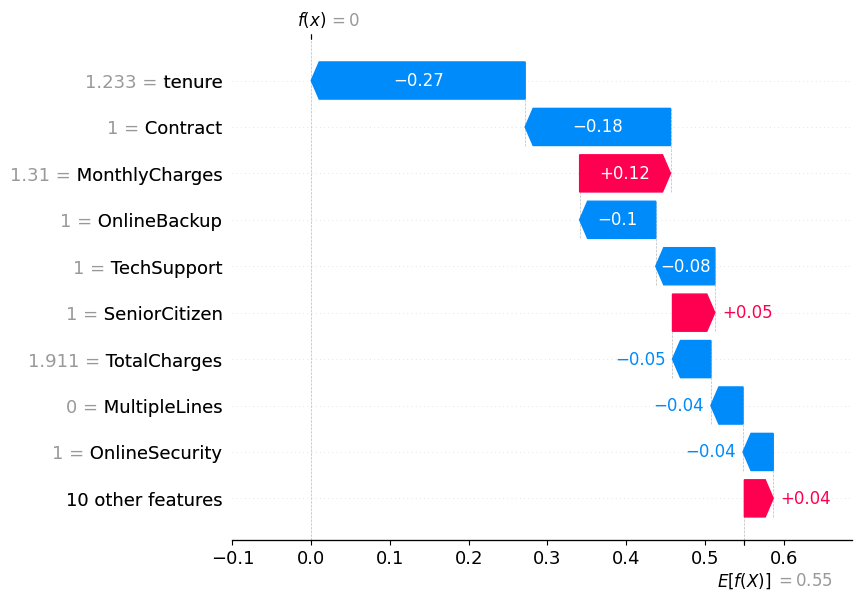

In [42]:
shap.plots.waterfall(shap_values[0])

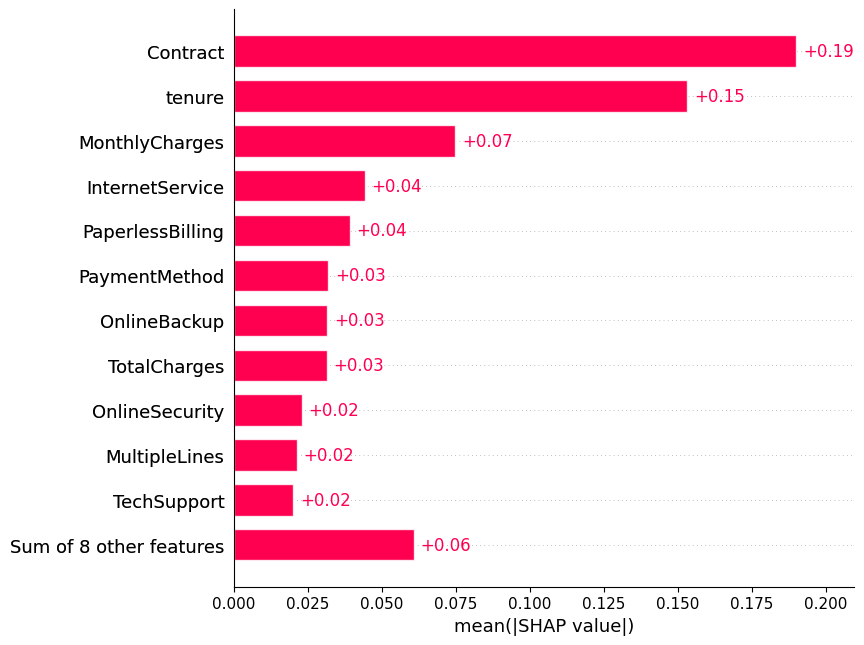

In [62]:
shap.plots.bar(shap_values, max_display=12)

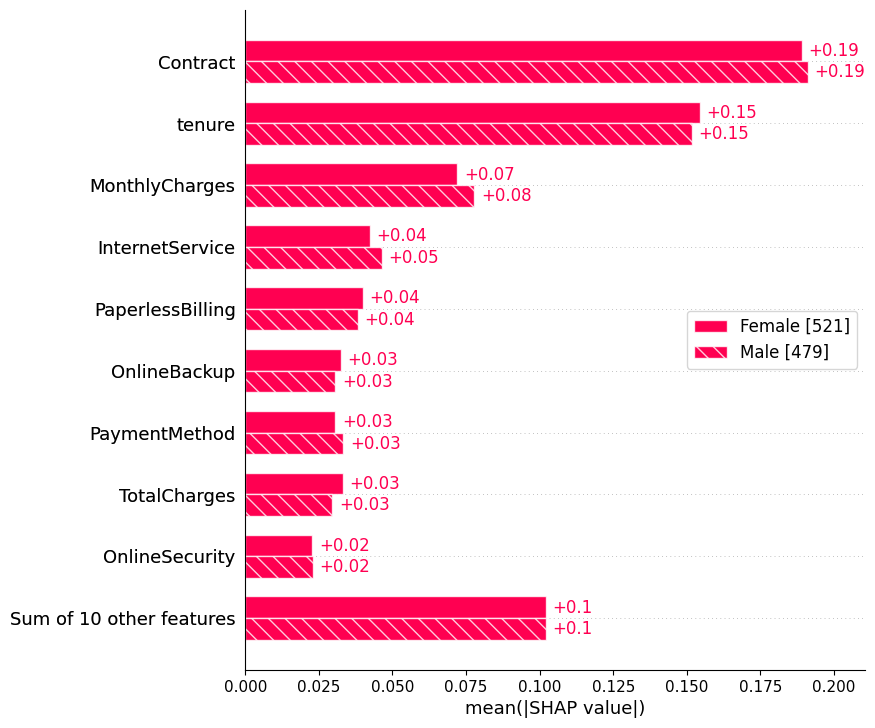

In [43]:
sex = ["Female" if shap_values[i,"gender"].data == 0 else "Male" for i in range(shap_values.shape[0])]
shap.plots.bar(shap_values.cohorts(sex).abs.mean(0))